In [1]:
# Importar a biblioteca pandas
import pandas as pd

# Importar a biblioteca Matplotlib
import matplotlib.pyplot as plt

# Importar a biblioteca seaborn
import seaborn as sns

# Importar a biblioteca numpy
import numpy as np


In [2]:
# Importar a biblioteca do google para aceder aos ficheiros no Google Drive

from google.colab import drive
drive.mount('/content/drive')

ficheiro_de_dados_local = ("/content/drive/MyDrive/EDIT - Data Science/IRIS.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Carregar o conjunto de dados a partir do arquivo CSV
iris_data = pd.read_csv(ficheiro_de_dados_local)

# Verificar as dimensões do conjunto de dados
num_rows, num_columns = iris_data.shape
print(f"Dimensão do conjunto de dados: {num_rows} linhas x {num_columns} colunas")
print("\n")

# Exibir as primeiras linhas do conjunto de dados para verificar suas características
print("Amostras das primeiras linhas do conjunto de dados:")
print(iris_data.head())
print("\n")

# Exibir informações sobre o conjunto de dados, incluindo estatísticas descritivas
print("\nInformações do conjunto de dados:")
print(iris_data.info())
print("\n")
print("\nEstatísticas descritivas do conjunto de dados:")
print(iris_data.describe())
print("\n")

Dimensão do conjunto de dados: 150 linhas x 5 colunas


Amostras das primeiras linhas do conjunto de dados:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa



Informações do conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory

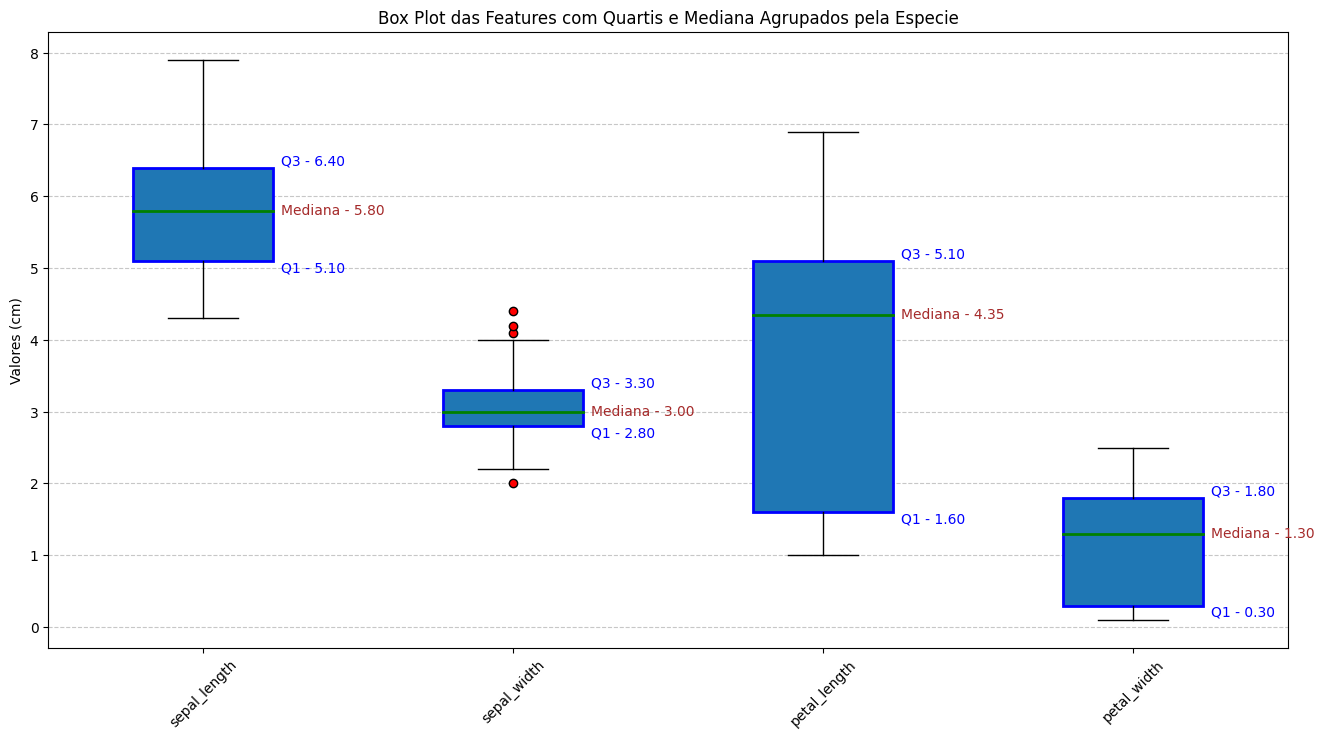

In [4]:
# Criar box plots para as quatro features

# Selecionar apenas as colunas de características (excluindo a coluna "species")
features = iris_data.drop("species", axis=1)

# Criar o gráfico de caixa com informações de quartis e mediana
plt.figure(figsize=(16, 8))

boxprops = dict(linestyle='-', linewidth=2, color='blue')
flierprops = dict(marker='o', markersize=6, markerfacecolor='red')
medianprops = dict(linestyle='-', linewidth=2, color='green')

box = plt.boxplot(features.values, patch_artist=True, flierprops=flierprops, boxprops=boxprops, medianprops=medianprops)

# Identificação de quartis (Q1, Q3) e mediana e colocá-los ao lado dos box plots
for i, col in enumerate(features.columns):
    data = features[col]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    median = data.median()

    # Exibir os valores de Q1, Q3 e mediana ao lado dos box plots
    plt.text(i + 1.25, q1, f'Q1 - {q1:.2f}', ha='left', va='top', color='blue')
    plt.text(i + 1.25, q3, f'Q3 - {q3:.2f}', ha='left', va='bottom', color='blue')
    plt.text(i + 1.25, median, f'Mediana - {median:.2f}', ha='left', va='center', color='brown')

plt.title("Box Plot das Features com Quartis e Mediana Agrupados pela Especie")
plt.ylabel("Valores (cm)")
plt.xticks(range(1, len(features.columns) + 1), features.columns, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

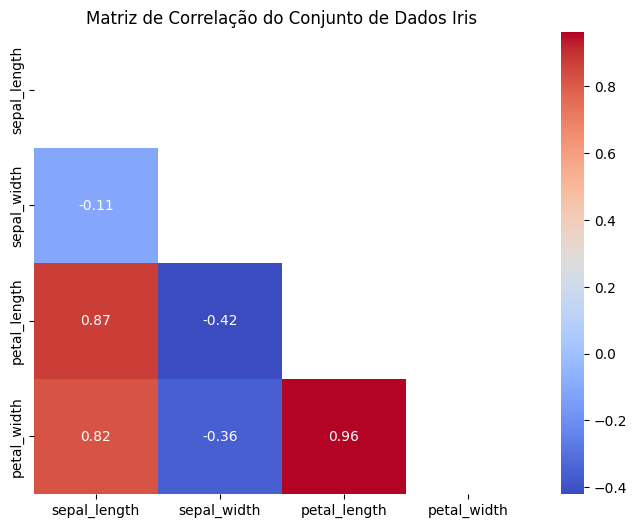

In [5]:
# Calcular a matriz de correlação
correlation_matrix = iris_data.corr(numeric_only=True)

# Criar uma máscara para ocultar a metade superior da matriz (opcional, mas ajuda a visualização)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Configurar o tamanho da figura
plt.figure(figsize=(8, 6))

# Gerar o mapa de calor da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask)

# Definir título
plt.title("Matriz de Correlação do Conjunto de Dados Iris")

# Exibir a matriz de correlação
plt.show()

In [6]:
# Caracteristicas do dataset mas agora com os dados agrupados pela feature "Species"
grouped_iris = iris_data.groupby('species')

# Iterar sobre os grupos e calcular estatísticas para cada um
for species, group in grouped_iris:
    print(f"Espécie: {species}")
    print(f"Dimensão do grupo: {group.shape[0]} linhas x {group.shape[1]} colunas")
    print("Estatísticas descritivas:")
    print(group.describe())
    print("\n")

Espécie: Iris-setosa
Dimensão do grupo: 50 linhas x 5 colunas
Estatísticas descritivas:
       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000


Espécie: Iris-versicolor
Dimensão do grupo: 50 linhas x 5 colunas
Estatísticas descritivas:
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      

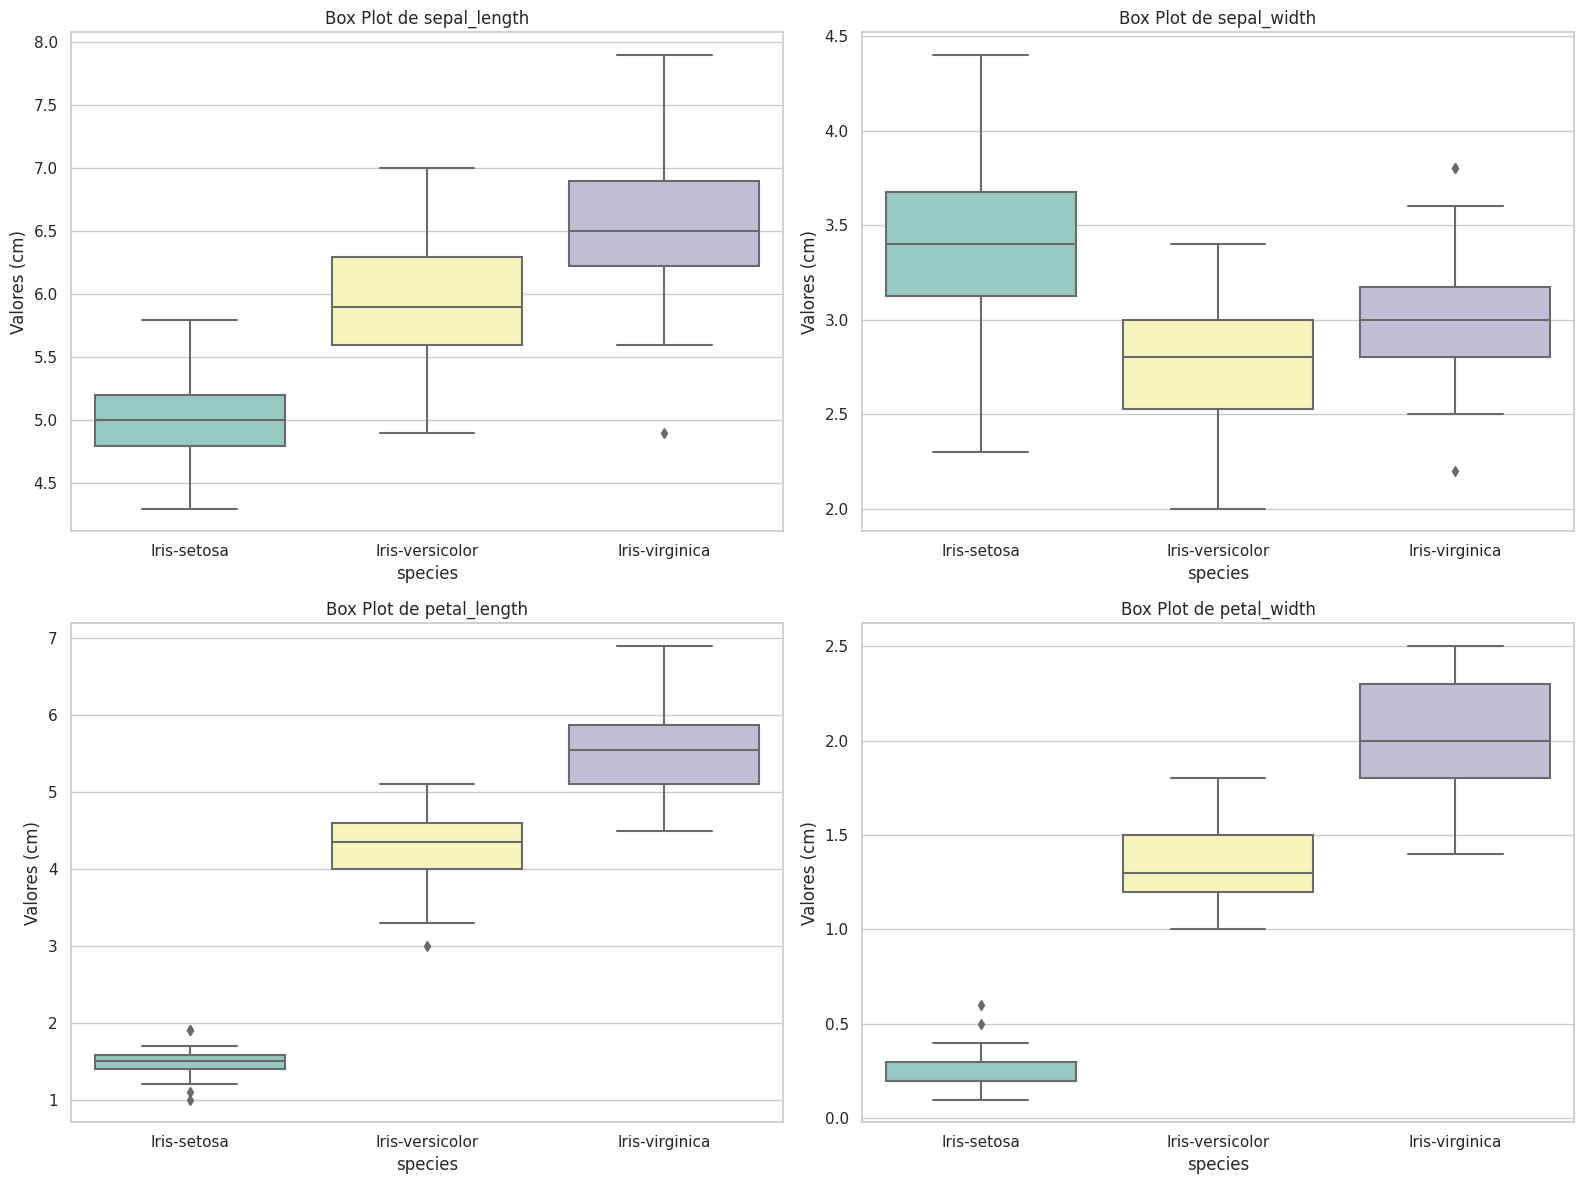

In [7]:
# Criar box plots para cada feature, mas agora com os dados agrupados pela feature "Species"

# Definir o estilo do gráfico
sns.set(style="whitegrid")


plt.figure(figsize=(16, 12))
for i, feature in enumerate(iris_data.columns[:-1]):  # Excluindo a coluna "species"
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x="species", y=feature, data=iris_data, palette="Set3")
    plt.title(f"Box Plot de {feature}")
    plt.ylabel("Valores (cm)")

plt.tight_layout()
plt.show()

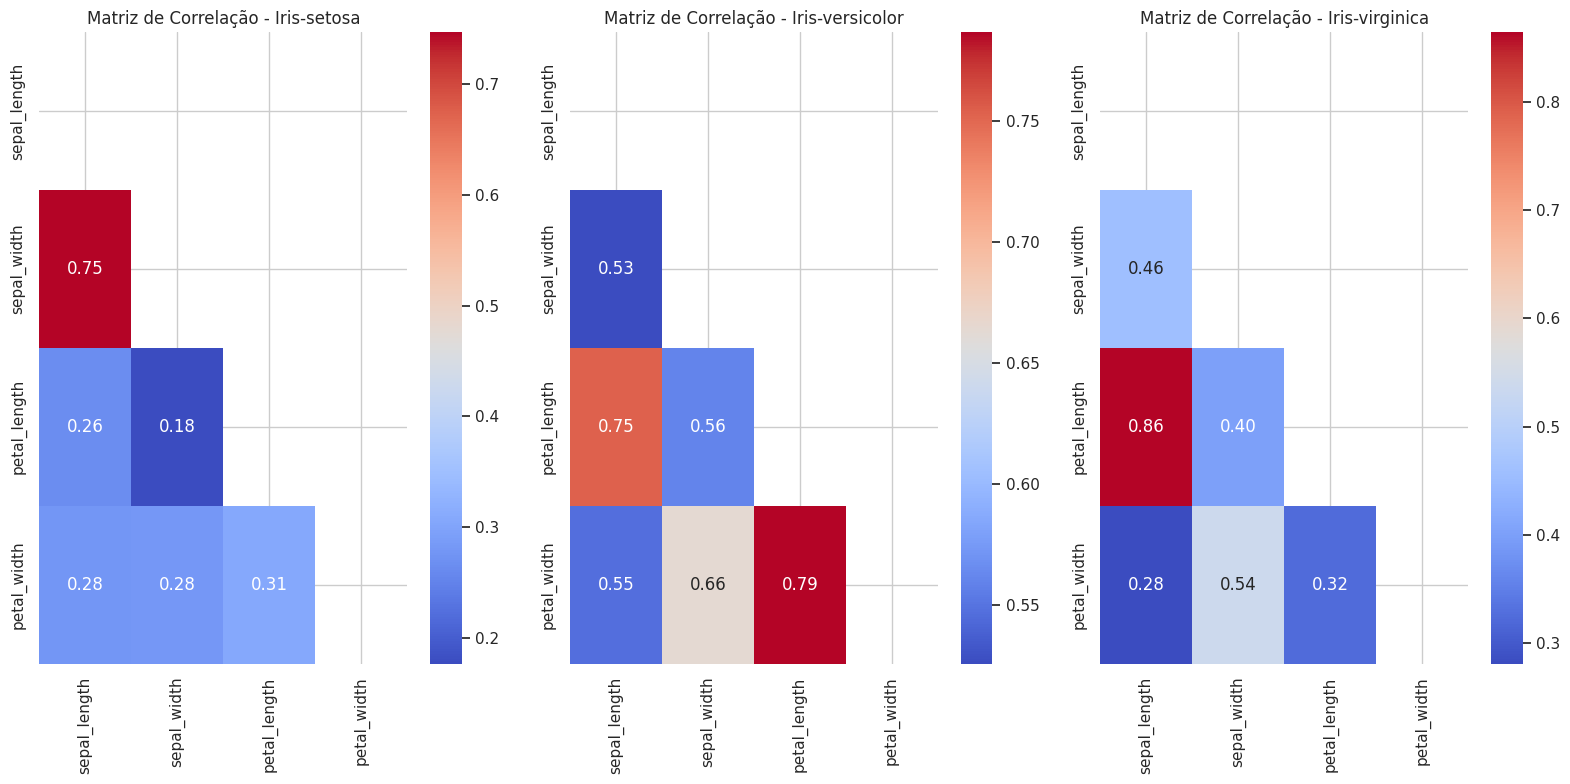

In [8]:
# Divida os dados por espécie
grouped = iris_data.groupby('species')

# Crie subplots para cada espécie
fig, axes = plt.subplots(nrows=1, ncols=len(grouped), figsize=(16, 8))

# Itere pelos grupos e gere uma matriz de correlação para cada espécie
for i, (name, group) in enumerate(grouped):
    correlation_matrix = group.corr(numeric_only=True)

    # Crie uma máscara para ocultar a metade superior da matriz (opcional, mas ajuda na visualização)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Gere o mapa de calor da matriz de correlação para esta espécie
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask, ax=axes[i])
    axes[i].set_title(f"Matriz de Correlação - {name}")

# Ajuste a disposição dos subplots
plt.tight_layout()

# Exiba a matriz de correlação para cada espécie
plt.show()

<Figure size 1000x800 with 0 Axes>

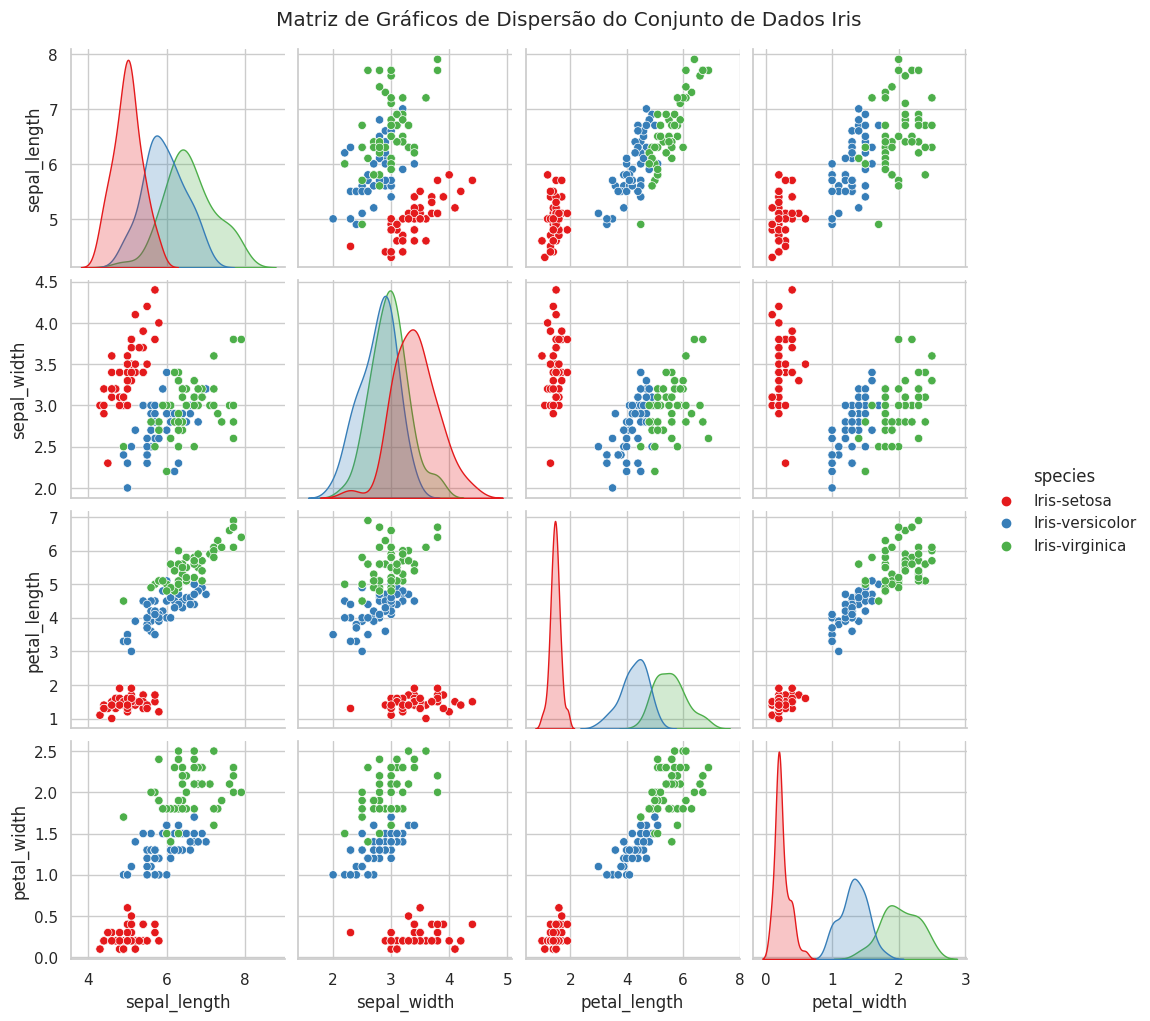

In [9]:
# Matriz de graficos de dispersão do Dataset

# Configurar o tamanho da figura
plt.figure(figsize=(10, 8))

# Gerar a matriz de gráficos de dispersão
sns.pairplot(iris_data, hue="species", palette="Set1")

# Definir título
plt.suptitle("Matriz de Gráficos de Dispersão do Conjunto de Dados Iris", y=1.02)

# Exibir a matriz de gráficos de dispersão
plt.show()